In [5]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
#загрузка массива данных для обучения моделей
filename='data14'

imall,yy = pickle.load(open(filename, 'rb'))
# масштабирование величины яркости пикселей из формы 0-255 в форму 0 - 1
imall=imall/255.0
yy.shape
weight=(len(yy)-yy.sum())/yy.sum()

1.0

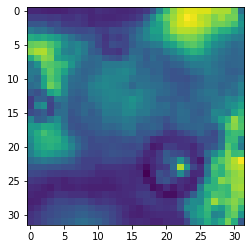

In [2]:
#отрисовка элемената b и вывод значения сфера или нет
b=4121
plt.imshow(np.reshape(imall[b,:],(32,32)))
yy[b]

In [3]:
#разбивка массива анных на тестовую 5% и обучающую выборки 95%
from sklearn.model_selection import  train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(imall,yy,random_state=0,test_size=0.05)


#преобразование формы массива для ее соответствия функции fit керас
Xtrain=np.reshape(Xtrain,(len(Xtrain),32,32,1)).astype('float32')
ytrain=np.reshape(ytrain,(len(ytrain),1)).astype('float32')
Xtest=np.reshape(Xtest,(len(Xtest),32,32,1)).astype('float32')
ytest=np.reshape(ytest,(len(ytest),1)).astype('float32')

ytr1=np.zeros((len(ytrain),1))
ytr2=np.zeros((len(ytrain),1))
ytr1[ytrain==0]=1
ytr1[ytrain==1]=1
ytr=np.hstack((ytr1,ytr2))

yte1=np.zeros((len(ytest),1))
yte2=np.zeros((len(ytest),1))
yte1[ytest==0]=1
yte1[ytest==1]=1
yte=np.hstack((yte1,yte2))

In [4]:
#загрузка керас и тензорфлоу
import os
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
import cv2
import os
import math
import random
import pickle
#keras import and windows InteractiveSession bug fix
from tensorflow.keras.optimizers import SGD,schedules
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics as ms
from tensorflow.keras import  Model
from tensorflow.keras.layers import Input,Conv2D, Concatenate, MaxPooling2D,Activation,concatenate,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Dropout, BatchNormalization,Flatten,Dense,Reshape

import tensorflow.keras.backend as K


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Concatenate, MaxPooling2D,Conv2DTranspose,Input
from tensorflow.keras.layers import UpSampling2D, Dropout, BatchNormalization

In [9]:
from tensorflow.keras.models import load_model
#обучение 7 разных моделей с кратно увеличивающимся количеством конволюционных слоев
dim=16
modelhs=[]
ps=32
for i in range(1): #7
    model = load_model('model14ll16.h5')
    '''
    print(dim)
    model = tf.keras.Sequential()
    
    model.add(Conv2D(dim, kernel_size=(3,3), padding='same', input_shape=(ps, ps, 1), activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(dim, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(dim*2, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(dim*2, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    
    
    model.add(Flatten(input_shape=(32, 32, 1)))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization())  
        
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.SGD(lr=0.01, decay=0.025 / 200, momentum=0.9, nesterov=False)
    model.compile(optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy'])

    '''
    class_weights = {0: 1.,
                    1: weight}

    K.set_value(model.optimizer.learning_rate, 0.005)
    model.summary()
    # train the network
    H=model.fit(Xtrain, ytrain, epochs=200, validation_data=(Xtest, ytest),class_weight =class_weights, verbose=1,shuffle = True, batch_size=1000)
    model.save('model14x'+str(16)+'n.h5', overwrite=True)
    #формирование массива с историей обучения моделей
    modelhs.append(dim)
    modelhs.append(H.history['loss'])
    modelhs.append(H.history["val_loss"])
    modelhs.append(H.history["accuracy"])
    modelhs.append(H.history["val_accuracy"])
    dim=dim*2
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       1

734/734 [==============================] - 18s 25ms/step - loss: 0.0678 - accuracy: 0.9863 - val_loss: 0.0261 - val_accuracy: 0.9907
Epoch 39/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0682 - accuracy: 0.9863 - val_loss: 0.0509 - val_accuracy: 0.9825
Epoch 40/200
734/734 [==============================] - 19s 25ms/step - loss: 0.0687 - accuracy: 0.9864 - val_loss: 0.0487 - val_accuracy: 0.9833
Epoch 41/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0685 - accuracy: 0.9864 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 42/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0678 - accuracy: 0.9865 - val_loss: 0.0418 - val_accuracy: 0.9855
Epoch 43/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0682 - accuracy: 0.9865 - val_loss: 0.0322 - val_accuracy: 0.9886
Epoch 44/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0649 - accuracy: 0.9868 - val_loss: 0.0317 - val_accuracy

734/734 [==============================] - 19s 25ms/step - loss: 0.0564 - accuracy: 0.9883 - val_loss: 0.0291 - val_accuracy: 0.9896
Epoch 95/200
734/734 [==============================] - 19s 25ms/step - loss: 0.0561 - accuracy: 0.9883 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 96/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0572 - accuracy: 0.9881 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 97/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0558 - accuracy: 0.9884 - val_loss: 0.0233 - val_accuracy: 0.9919
Epoch 98/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0565 - accuracy: 0.9882 - val_loss: 0.0264 - val_accuracy: 0.9909
Epoch 99/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0560 - accuracy: 0.9881 - val_loss: 0.0270 - val_accuracy: 0.9905
Epoch 100/200
734/734 [==============================] - 18s 25ms/step - loss: 0.0564 - accuracy: 0.9882 - val_loss: 0.0265 - val_accurac

Epoch 150/200
734/734 [==============================] - 22s 30ms/step - loss: 0.0500 - accuracy: 0.9893 - val_loss: 0.0461 - val_accuracy: 0.9845
Epoch 151/200
734/734 [==============================] - 22s 30ms/step - loss: 0.0505 - accuracy: 0.9892 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 152/200
734/734 [==============================] - 22s 30ms/step - loss: 0.0513 - accuracy: 0.9891 - val_loss: 0.0266 - val_accuracy: 0.9909
Epoch 153/200
734/734 [==============================] - 25s 34ms/step - loss: 0.0505 - accuracy: 0.9891 - val_loss: 0.0295 - val_accuracy: 0.9898
Epoch 154/200
734/734 [==============================] - 27s 37ms/step - loss: 0.0501 - accuracy: 0.9892 - val_loss: 0.0238 - val_accuracy: 0.9921
Epoch 155/200
734/734 [==============================] - 27s 36ms/step - loss: 0.0506 - accuracy: 0.9891 - val_loss: 0.0236 - val_accuracy: 0.9921
Epoch 156/200
734/734 [==============================] - 27s 36ms/step - loss: 0.0499 - accuracy: 0.9894 - val_loss: 0

In [10]:
#сохранение результатов обучения
filename='modellearn_data'
pickle.dump(modelhs, open(filename, 'wb'))